## BIKE SHARING ASSIGNMENT 

## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

    Which variables are significant in predicting the demand for shared bikes.
    How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

In [1]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset
day = pd.read_csv('D:\\upGrad\\DS\\Assignments\\Assignment-3\\day.csv')

In [3]:
#check head of data
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#check shape of data
day.shape

(730, 16)

In [5]:
#print summary of data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
#print descriptive statistics of data
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 1: Reading and Understanding the Data


In [7]:
#dropping unnecessary variables
day.drop("instant",axis=1,inplace=True)
day.drop("dteday",axis=1,inplace=True)
day.drop("casual",axis=1,inplace=True)
day.drop("registered",axis=1,inplace=True)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


"instant" is a unique variable.
"dteday" is basically date which is already present individually in the columns yr and month.
sum of "casual" and "registered" is directly proprortional to the cnt which makes them a target variable and can be replaced with "cnt". Hence these two variables will not be available at the time of making predictions.

In [8]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Step 2: Visualising the Data

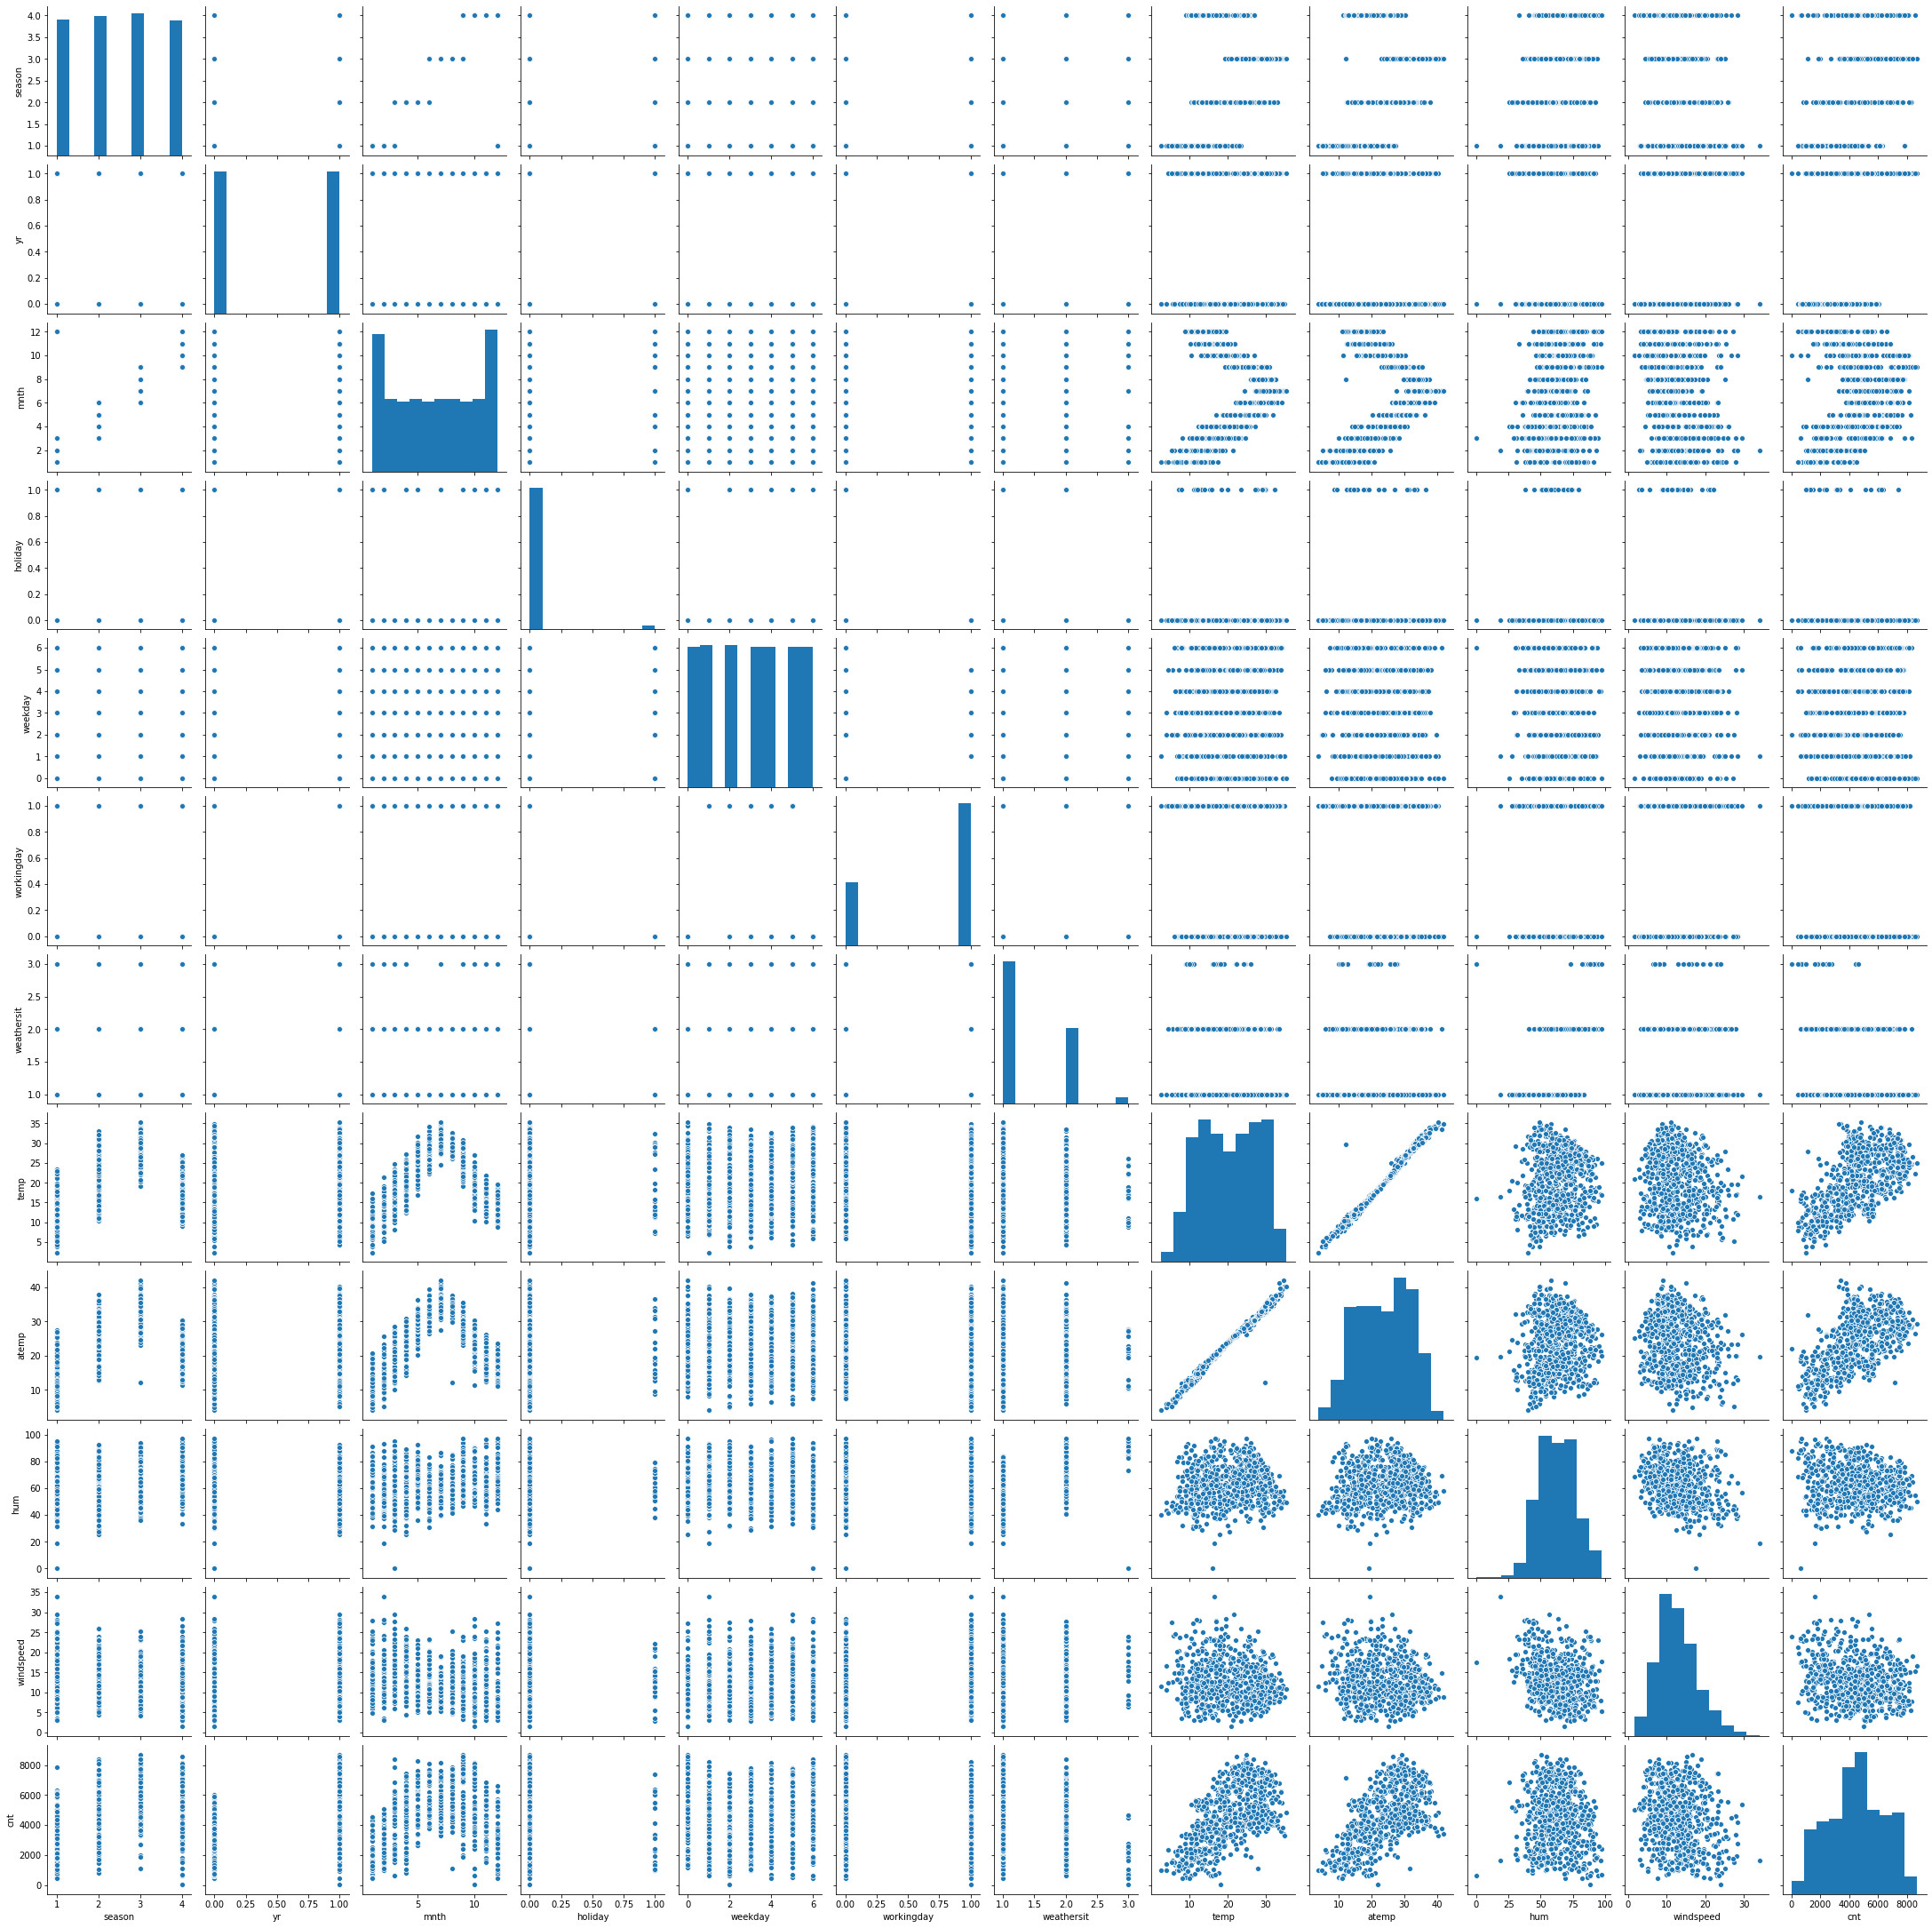

In [9]:
sns.pairplot(day)
plt.show()

In [10]:
day["season"].unique()

array([1, 2, 3, 4], dtype=int64)

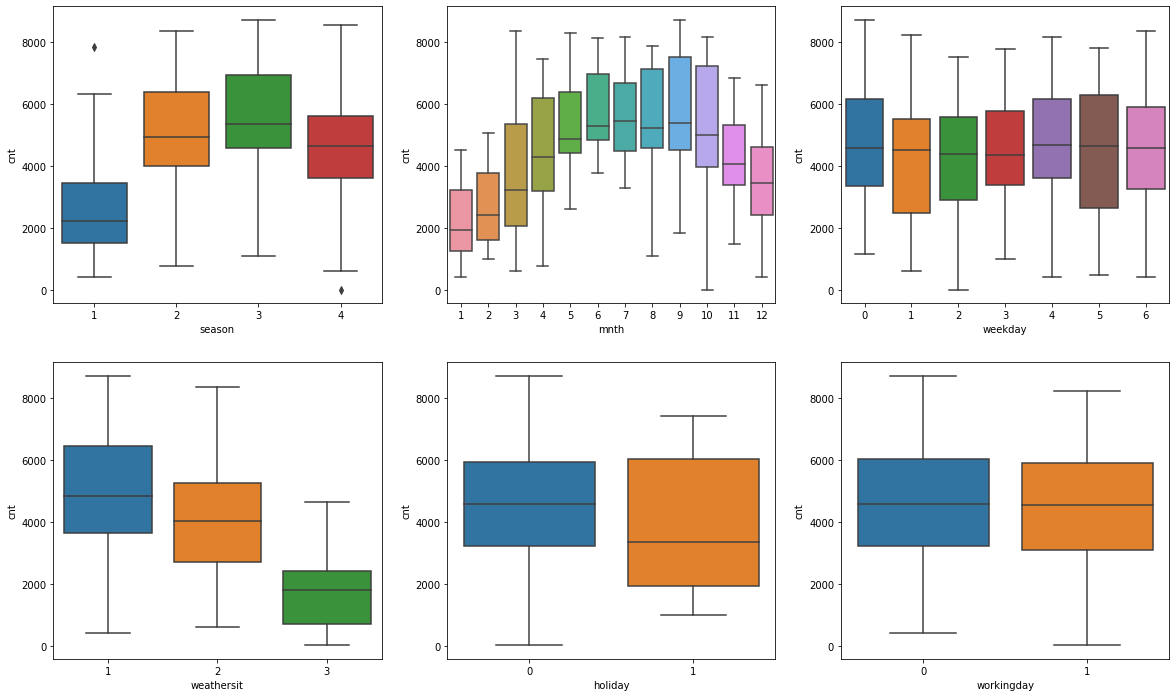

In [11]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = day)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)
plt.show()

In [12]:
day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Step 3: Data Preparation

### Converting feature values into categorical string values

In [13]:
#convert feature values into categorical string values
day["season"] = day["season"].apply(lambda x: "spring" if x == 1 else ("summer" if x==2 else ("fall" if x==3 else "winter")))

In [14]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
months = {1: "Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"}
day = day.replace({"mnth":months})
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [16]:
days = {0: "Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"}
day = day.replace({"weekday":days})

In [17]:
weather = {1: "Clear", 2:"Cloudy", 3:"Light Snow Rain", 4:"Heavy Snow Rain"}
day = day.replace({"weathersit":weather})

In [18]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating dummy variables

In [19]:
#creating dummy variables for column season
status1= pd.get_dummies(day['season'])
status1.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [20]:
#drop the first column from status as type of season can be identified using last three columns
status1 =  pd.get_dummies(day['season'], drop_first = True)

In [21]:
# Add the results to the original day dataframe

day = pd.concat([day, status1], axis =1)

In [22]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,Jan,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,Jan,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [23]:
#creating dummy variables for column mnth
status2 = pd.get_dummies(day['mnth'], drop_first = True)

# Add the results to the original day dataframe
day = pd.concat([day, status2], axis =1)

In [24]:
#creating dummy variables for column weekday
status3 = pd.get_dummies(day['weekday'], drop_first = True)

# Add the results to the original day dataframe
day = pd.concat([day, status3], axis =1)

In [25]:
#creating dummy variables for column weathersit
status4 = pd.get_dummies(day['weathersit'], drop_first = True)

# Add the results to the original day dataframe
day = pd.concat([day, status4], axis =1)

In [26]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
0,spring,0,Jan,0,Monday,1,Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,spring,0,Jan,0,Tuesday,1,Cloudy,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,1,0
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Drop above columns as dummies have been created the for it

day.drop(["season"], axis = 1, inplace = True)
day.drop(["mnth"], axis = 1, inplace = True)
day.drop(["weekday"], axis = 1, inplace = True)
day.drop(["weathersit"], axis = 1, inplace = True)

In [28]:
day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


# Step 4: Splitting the Data into Training and Testing Sets


In [29]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(day, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features use MinMax scaling.

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [31]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['temp', 'atemp','windspeed', "hum"]

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,0,1,0,0,0,1,0


In [32]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,4486.382353,0.243137,0.245098,...,0.086275,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,1952.158739,0.429398,0.430568,...,0.281045,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


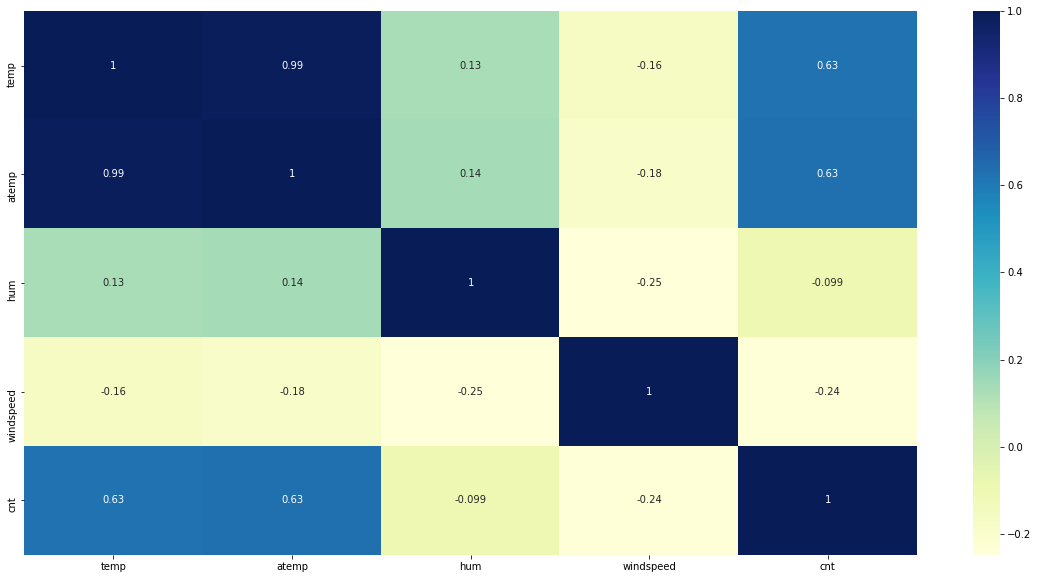

In [33]:
#check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (20, 10))
sns.heatmap(day[['temp', 'atemp','hum', 'windspeed', 'cnt']].corr(), annot = True, cmap="YlGnBu")
plt.show()


Since atemp and temp are collinear with each other, hence we will drop atemp

In [34]:
#dropping atemp
day = day.drop(["atemp"],axis=1)

### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('cnt')
X_train = df_train

# Step 5 : Building our model using Recursive Feature Elimination(RFE)

In [36]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 7),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', False, 4),
 ('Sunday', False, 5),
 ('Thursday', False, 13),
 ('Tuesday', False, 8),
 ('Wednesday', False, 11),
 ('Cloudy', True, 1),
 ('Light Snow Rain', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy',
       'Light Snow Rain'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model `lm1` using statsmodel, for the detailed statistics

In [41]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [42]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [43]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [44]:
# Check the parameters obtained

lm1.params

const              2805.556199
yr                 2002.011871
holiday            -792.957628
temp               4171.955822
hum               -1392.692790
windspeed         -1638.069644
spring             -536.614549
summer              354.345769
winter              899.054692
Dec                -323.338009
Jan                -380.257300
Jul                -482.365394
Nov                -355.925870
Sep                 650.955478
Cloudy             -485.676909
Light Snow Rain   -2156.625822
dtype: float64

In [45]:
#Print the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          3.34e-189
Time:                        13:07:42   Log-Likelihood:                -4111.1
No. Observations:                 510   AIC:                             8254.
Df Residuals:                     494   BIC:                             8322.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2805.5562    313.247     

In [46]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,82.48
6,spring,5.27
3,temp,4.42
8,winter,3.83
7,summer,2.76
4,hum,1.93
12,Nov,1.76
10,Jan,1.68
14,Cloudy,1.57
9,Dec,1.49


### Since VIF value of spring is greater than 5, it is insignificant and hence we should drop it.

In [47]:
X_train_new = X_train_rfe.drop(["spring"], axis = 1)

### Rebuilding the model `lm2` without column spring

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [49]:
# Running the linear model
lm2 = sm.OLS(y_train,X_train_lm).fit()   

In [50]:
#Print the summary of our linear model
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          1.54e-188
Time:                        13:07:42   Log-Likelihood:                -4115.4
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     495   BIC:                             8324.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2249.6749    249.969     

### Since the variables Nov and Dec have high p-value respectively, we will drop the variable Nov.

In [51]:
# Print columns 
X_train_new.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Cloudy',
       'Light Snow Rain'],
      dtype='object')

In [52]:
#Dropping constants from X_train_new
X_train_new1 = X_train_new.drop(['Nov'], axis=1)

### Rebuilding the model `lm3` without column Nov

In [53]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

In [54]:
# Running the linear model
lm3 = sm.OLS(y_train,X_train_lm).fit()  

In [55]:
#Print the summary of our linear model
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.3
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          4.25e-189
Time:                        13:07:42   Log-Likelihood:                -4116.8
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8321.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2193.6594    248.168     

### Since the variable Dec has high p-value, we will drop this variable.

In [56]:
X_train_new1.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Sep', 'Cloudy', 'Light Snow Rain'],
      dtype='object')

In [57]:
X_train_new2 = X_train_new1.drop(["Dec"], axis = 1)

### Rebuilding the model `lm4` without column Dec

In [58]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

In [59]:
# Running the linear model
lm4 = sm.OLS(y_train,X_train_lm).fit()

In [60]:
#Print the summary of our linear model
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 26 Oct 2020   Prob (F-statistic):          6.03e-190
Time:                        13:07:42   Log-Likelihood:                -4117.6
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     497   BIC:                             8316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2145.9539    245.307     

### since all the p-values are less than 0.05 we will calculate VIF.

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,49.60
3,temp,2.06
4,hum,1.88
8,Jan,1.55
11,Cloudy,1.55
7,winter,1.53
9,Jul,1.43
6,summer,1.41
12,Light Snow Rain,1.24
5,windspeed,1.19


### Since now all the variables have significant p-values(<0.50) and VIFs(<5), we can move forward and make check further assumptions.

## Residual Analysis of the train data
So, now to check if the error terms are also normally distributed, plotting the histogram of the error terms.

In [68]:
y_train_cnt = lm4.predict(X_train_lm)

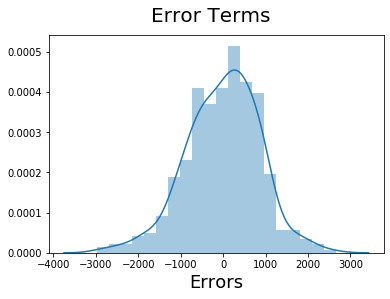

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### Since the error terms are normally distributed, which satisfies the assumption, now moving forward to making predictions.

# Step 6: Making Predictions using the Final Model

### Applying the scaling on the test sets

In [70]:
# Making similar transformations as train set
num_vars = ['temp', 'atemp','windspeed', "hum"]

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
184,0,1,0,0.831783,0.769660,0.657364,0.084219,6043,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,6211,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,2659,0,0,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,4780,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,4968,0,1,...,0,0,0,1,0,0,0,0,0,0


In [71]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy,Light Snow Rain
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,4546.981735,0.255708,0.264840,...,0.082192,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,1898.633630,0.437258,0.442259,...,0.275286,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,441.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,3303.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,4579.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,5869.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,8395.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [76]:
final_features = X_train_new2.columns
final_features

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Jan', 'Jul', 'Sep', 'Cloudy', 'Light Snow Rain'],
      dtype='object')

In [77]:
final_features.drop(["const"])

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'winter', 'Jan',
       'Jul', 'Sep', 'Cloudy', 'Light Snow Rain'],
      dtype='object')

In [79]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new2.columns.drop(["const"])]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
lm_test = sm.OLS(y_test,X_test_new).fit() 
lm_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     77.57
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           1.62e-69
Time:                        13:15:51   Log-Likelihood:                -1776.4
No. Observations:                 219   AIC:                             3579.
Df Residuals:                     206   BIC:                             3623.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1969.0056    422.604      4.659      0.000    1135.822    2802.189
yr               1962.4011    116.484     16.847      0.000    1732.747    2192.056
holiday          -538.5724    303.284     -1.776      0.077   -1136.512      59.367
temp             5102.4990    343.625     14.849      0.000    4425.026    5779.972
hum             -2162.1736    572.235     -3.778      0.000   -3290.362   -1033.985
windspeed        -753.6151    403.243     -1.869      0.063   -1548.627      41.397
summer            706.5116    161.349      4.379      0.000     388.404    1024.619
winter           1330.6551    159.445      8.346      0.000    1016.303    1645.008
Jan              -187.4841    245.125     -0.765      0.445    -670.759     295.791
Jul              -131.3893    245.159     -0.536      0.593    -614.733     351.954
Sep               767.1813    228.167      3.362      0.001     317.340    1217.023
Cloudy           -251.7635    159.114     -1.582      0.115    -565.464      61.937
Light Snow Rain -1213.1900    421.249     -2.880      0.004   -2043.702    -382.678
==============================================================================
Omnibus:                       23.452   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.072
Skew:                          -0.723   Prob(JB):                     2.95e-07
Kurtosis:                       4.098   Cond. No.                         20.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
lm_test.params

const              1969.005571
yr                 1962.401087
holiday            -538.572391
temp               5102.498979
hum               -2162.173580
windspeed          -753.615115
summer              706.511577
winter             1330.655106
Jan                -187.484092
Jul                -131.389265
Sep                 767.181281
Cloudy             -251.763519
Light Snow Rain   -1213.190047
dtype: float64

In [82]:
# Making predictions
y_test_pred = lm4.predict(X_test_new)

# Step 7: Model Evaluation

Text(0, 0.5, 'y_pred')

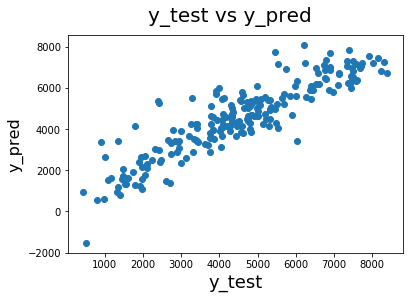

In [83]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

In [84]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [85]:
# Checking the R-squared on the test set
r_squared = r2_score(y_true = y_test, y_pred = y_test_pred)
r_squared

0.8029170032329543

Hence the variables which are significant in predicting the demand for shared bikes are `yr`, `holiday`, `temp`, `hum`, `windspeed`, `summer`, `winter`,`Jan`, `Jul`, `Sep`, `Cloudy`, `Light Snow Rain`.

We can see that the equation of our best fitted line is:

cnt=1969.0056+1962.4011×yr-538.5724×holiday-753.6151×windspeed+706.5116×summer-187.4841×Jan+767.1813×Sep-251.7635×Cloudy-1213.19×Light Snow Rain+5102.499×temp+1330.6551×winter-131.3893×Jul

Hence according to the model 
##### Yr, summer, Sep, temp and winter positively affect the demands for the bikes.
#### holiday, hum, windspeed, Jan, Jul, Light Snow Rain and Cloudy negatively affect the demands for the bikes.
#### Temp, Yr and Winter have high demands for the bikes
#### People avoid riding bikes in Humid weather as well as when there is light snow rain as the roads might not be suitable to ride bike in such weather.